In [1]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn==0.23.0

In [2]:
#!pip install --upgrade tensorflow

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import keras

In [4]:
from keras.datasets import mnist
(x_train, y_train), (x_pred, y_pred) = mnist.load_data()
#x_train.shape => [60000,28,28]
dim = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(len(x_train), dim)
#x_train.shape => [60000, 784]

# PCA

In [5]:
#from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
n_components = x_train.shape[1] 
pca = PCA(n_components)
model_pca = pca.fit(x_train)
x_pca_transform = model_pca.transform(x_train)

In [6]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)
threshold = 0.73
index = np.where(explained_variance > threshold)[0][0] + 1 #find the first meet of excees of 0.74
print("A number of principial components explain more than {0} variance is {1}".format(threshold, index))
print("Explained variance", explained_variance[index-4:index+1])

A number of principial components explain more than 0.73 variance is 30
Explained variance [0.708 0.716 0.724 0.731 0.737]


In [7]:
(x_train, y_train), (x_pred, y_pred) = mnist.load_data()
x_train = x_train.reshape(len(x_train), dim)
print("Before", x_train.shape)
M = 30
pca1 = PCA(n_components = M, svd_solver = 'full')
model_pca1 = pca1.fit(x_train)
x_pca_transform1 = model_pca1.transform(x_train)
print("After transform", x_pca_transform1.shape)

Before (60000, 784)
After transform (60000, 30)


In [9]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_pca_transform1, y_train, test_size = 0.3, random_state = 64)
print("Sample mean for zero column derived dataset {0:.2f}".format(np.mean(x_train1, axis = 0)[0]))

Sample mean for zero column derived dataset 0.87


# RandomForest

In [11]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [12]:
random_forest = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=64)
clf_rf = OneVsRestClassifier(random_forest)
clf_rf.fit(x_train1, y_train1)
rf_predictions = clf_rf.predict(x_test1)

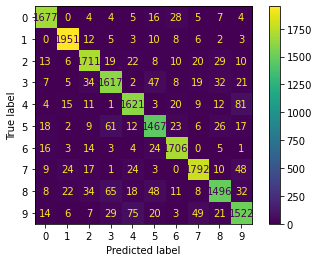

the number of correctly classified objects of class 5 for the test data is 1467


In [17]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
clf_rf_cm = confusion_matrix(y_test1, rf_predictions)
plot_confusion_matrix(clf_rf, x_test1, y_test1) #display_labels = y_test1)
plt.show();
target_class = 5
print("the number of correctly classified objects of class {0} for the test data is {1}".format(target_class, clf_rf_cm[target_class][target_class]))

# LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', random_state=64)
clf_lr = OneVsRestClassifier(lr)
clf_lr.fit(x_train1, y_train1)
lr_predictions = clf_lr.predict(x_test1)

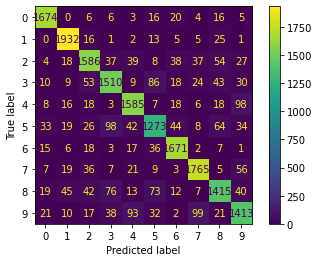

the number of correctly classified objects of class 6 for the test data is 1671


In [19]:
clf_lr_cm = confusion_matrix(y_test1, lr_predictions)
plot_confusion_matrix(clf_lr, x_test1, y_test1)
plt.show();
target_class = 6
print("the number of correctly classified objects of class {0} for the test data is {1}".format(target_class, clf_lr_cm[target_class][target_class]))

# Decision tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, random_state=64)
clf_dt = OneVsRestClassifier(dt)
clf_dt.fit(x_train1, y_train1)
dt_predictions = clf_dt.predict(x_test1)

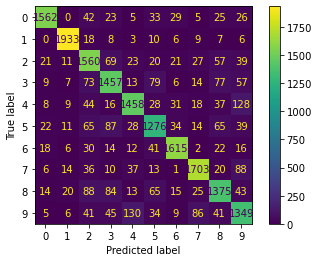

the number of correctly classified objects of class 8 for the test data is 1375


In [21]:
clf_dt_cm = confusion_matrix(y_test1, dt_predictions)
plot_confusion_matrix(clf_dt, x_test1, y_test1)
plt.show();
target_class = 8
print("the number of correctly classified objects of class {0} for the test data is {1}".format(target_class, clf_dt_cm[target_class][target_class]))

# PCA again

In [27]:
import pandas as pd

In [22]:
#url = 'https://courses.openedu.ru/assets/courseware/v1/25c0abab1076236b7427fac937c5663e/asset-v1:ITMOUniversity+ADVMLEN+spring_2021_ITMO+type@asset+block/pred_for_task.csv'
df = pd.read_csv('pred_for_task.csv')

NameError: name 'pd' is not defined

In [29]:
test_images = df[df["FileName"].isin(['file28', 'file23', 'file2'])]
test_images.set_index("FileName", inplace = True)
test_images.head()

,Label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f774,f775,f776,f777,f778,f779,f780,f781,f782,f783
FileName,,,,,,,,,,,,,,,,,,,,,
file2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file23,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file28,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
features = test_images.iloc[:,1:]
label = test_images.iloc[:,:1]
print(int(label.loc['file28']))

4


In [31]:
features_transform0 = model_pca1.transform(features)
features_transform = pd.DataFrame(features_transform0, index = features.index)

In [33]:
#prediction probability for file28 by random forest
file = 'file28'
proba = clf_rf.predict_proba(features_transform.loc[[file], :])
proba = proba[0]
target = int(label.loc[file])
print("Probability for {0} is {1:.3f}".format(file, proba[target]))

Probability for file28 is 0.900


In [34]:
#prediction probability for file29 by random forest
file = 'file23'
proba = clf_lr.predict_proba(features_transform.loc[[file], :])
proba = proba[0]
target = int(label.loc[file])
print("Probability for {0} is {1:.3f}".format(file, proba[target]))

Probability for file23 is 0.903


In [35]:
#prediction probability for file26 by decision tree
file = 'file6'
proba = clf_dt.predict_proba(features_transform.loc[[file], :])
proba = proba[0]
target = int(label.loc[file])
print("Probability for {0} is {1:.3f}".format(file, proba[target]))

KeyError: "None of [Index(['file26'], dtype='object', name='FileName')] are in the [index]"